In [43]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import os
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [3]:
data = pd.read_csv('./dataset/new/data.csv').drop(columns="Unnamed: 0")
labels = pd.read_csv('./dataset/new/labels.csv')

In [4]:
col_to_add = labels.iloc[:, 1]

# concatenate the two DataFrames along axis=1 (i.e., add a column to df1)
data = pd.concat([data, col_to_add], axis=1)

In [4]:
data.head()

,zcr_mean,zcr_std,yin_0,yin_1,yin_2,yin_3,yin_4,yin_5,yin_6,yin_7,...,cln_contrast_mean_5,cln_contrast_mean_6,cln_contrast_std_0,cln_contrast_std_1,cln_contrast_std_2,cln_contrast_std_3,cln_contrast_std_4,cln_contrast_std_5,cln_contrast_std_6,Aggregated
0,0.166783,0.079440,490.95706,491.75300,488.98358,485.07758,469.73868,513.68710,512.65735,245.0429,...,13.885087,17.060001,6.169077,3.001384,3.211213,4.549636,3.261581,3.175519,1.371739,0
1,0.241420,0.026630,467.41357,516.48170,515.56213,514.21027,509.39246,510.75034,511.41998,511.0642,...,14.805115,17.158812,4.463205,3.956305,1.962520,2.206298,2.378360,1.921748,2.072176,0
2,0.264509,0.023550,511.84506,508.17822,509.49075,509.44510,513.54913,512.35550,514.46606,515.2646,...,13.215790,16.725847,1.774137,3.766160,2.463165,1.830873,3.058117,1.740199,1.977650,0
3,0.295410,0.016382,514.25470,512.56980,4576.39400,4567.56050,4576.48800,4655.34030,4689.93850,4697.4040,...,13.193249,16.734816,3.230220,3.042296,3.633888,2.285815,2.923266,1.529872,1.633861,0
4,0.292899,0.026179,462.35953,4722.73050,4718.76900,4696.35940,4698.63870,4731.37550,4714.80960,4737.3643,...,12.740884,16.750946,3.083272,2.659685,3.981223,3.348599,2.550901,1.909587,1.636644,0


In [27]:
count_zeros = (data['Aggregated'] == 0).sum()

print(count_zeros)

85358


The following code is good, not a high classification but OK

In [5]:
# Split the data into features and labels
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Create a KFold object to split the data into k folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [6]:
# Initialize a list to store the accuracy scores for each fold
accuracy_scores_alldata = []

# Loop over each fold in the cross-validation
for train_idx, test_idx in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
    
    # Train a decision tree model on the training data
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    
    # Use the model to make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy score for this fold and append it to the list of accuracy scores
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_alldata.append(accuracy)

# Calculate the average accuracy score across all folds
avg_accuracy_alldata = np.mean(accuracy_scores_alldata)
print("Average accuracy:", avg_accuracy_alldata)


Average accuracy: 0.8425333333333335


In [24]:
print(accuracy_scores)

[0.8398333333333333, 0.842, 0.8444166666666667, 0.8449166666666666, 0.845125]


In [35]:
print(y_test[y_test != 0])

15        1
26        1
42        1
50        1
51        1
         ..
119797    6
119802    6
119808    6
119820    6
119823    6
Name: Aggregated, Length: 6941, dtype: int64


In [40]:
print(np.where(y_pred[y_pred == y_test] != 0, 1, 0).sum())

15687


In [42]:
print(np.where(y_test== 0, 1, 0).sum())

17059


In [43]:
print(15687/17059)

0.919573245794009


In [7]:
from sklearn.ensemble import RandomForestClassifier
accuracy_scores_alldataRF = []

In [8]:
# Loop over each fold in the cross-validation
for train_idx, test_idx in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
    
    # Train a decision tree model on the training data
    rf_classifier = RandomForestClassifier(n_estimators=100)
    rf_classifier.fit(X_train, y_train)
    
    # Use the model to make predictions on the testing data
    y_pred = rf_classifier.predict(X_test)
    
    # Calculate the accuracy score for this fold and append it to the list of accuracy scores
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_alldataRF.append(accuracy)
    
avg_accuracy_alldataRF = np.mean(accuracy_scores_alldataRF)
print("Average accuracy:", avg_accuracy_alldataRF)

Average accuracy: 0.9077500000000001


In [55]:
accuracy_scores

[0.902, 0.9015416666666667, 0.90625, 0.907625, 0.9048333333333334]

Algorithms with feature subset selection

In [9]:
X_subset_features=X.iloc[:, :282]
y = data.iloc[:, -1]
accuracy_scores_281featuresRF = []

In [10]:
for train_idx, test_idx in kf.split(X_subset_features):
    # Split the data into training and testing sets for this fold
    X_train, y_train = X_subset_features.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X_subset_features.iloc[test_idx], y.iloc[test_idx]
    
    # Train a decision tree model on the training data
    rf_classifier = RandomForestClassifier(n_estimators=100)
    rf_classifier.fit(X_train, y_train)
    
    # Use the model to make predictions on the testing data
    y_pred = rf_classifier.predict(X_test)
    
    # Calculate the accuracy score for this fold and append it to the list of accuracy scores
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_281featuresRF.append(accuracy)
    
avg_accuracy_281featuresRF = np.mean(accuracy_scores_281featuresRF)
print("Average accuracy:", avg_accuracy_281featuresRF)

Average accuracy: 0.9039666666666666


In [11]:
accuracy_scores_281featuresDTC = []

In [12]:
for train_idx, test_idx in kf.split(X_subset_features):
    # Split the data into training and testing sets for this fold
    X_train, y_train = X_subset_features.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X_subset_features.iloc[test_idx], y.iloc[test_idx]
    
    # Train a decision tree model on the training data
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    
    # Use the model to make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy score for this fold and append it to the list of accuracy scores
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_281featuresDTC.append(accuracy)

# Calculate the average accuracy score across all folds
avg_accuracy_281featuresDTC = np.mean(accuracy_scores_281featuresDTC)
print("Average accuracy:", avg_accuracy_281featuresDTC)

Average accuracy: 0.8374166666666667


Feature selection with husseins code

In [13]:
data = pd.read_csv('./dataset/new/data.csv').drop(columns="Unnamed: 0")

In [14]:
correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
reduced_matrix = correlation_matrix.mask(mask)
feature_redundancy = reduced_matrix.abs().sum()
sorted_features = feature_redundancy.sort_values(ascending=False)

threshold = 0.9
selected_features = []
for feature in sorted_features.index:
    if not any(np.abs(correlation_matrix[feature][selected_features]) > threshold):
        selected_features.append(feature)

data = data[selected_features]

In [15]:
col_to_add = labels.iloc[:, 1]

# concatenate the two DataFrames along axis=1 (i.e., add a column to df1)
data = pd.concat([data, col_to_add], axis=1)

In [16]:
data.head()

,raw_melspect_std_35,raw_melspect_std_34,raw_melspect_std_33,raw_melspect_std_36,raw_melspect_std_38,raw_melspect_std_37,raw_melspect_std_39,raw_melspect_std_32,raw_melspect_std_40,raw_melspect_std_42,...,cln_contrast_mean_0,cln_contrast_mean_1,cln_contrast_std_3,cln_contrast_std_4,cln_contrast_std_5,cln_contrast_std_2,cln_contrast_std_1,cln_contrast_std_0,cln_contrast_std_6,Aggregated
0,0.298099,0.328444,0.368817,0.370997,0.176198,0.217133,0.174130,0.293605,0.192146,0.257332,...,10.763522,5.012050,4.549636,3.261581,3.175519,3.211213,3.001384,6.169077,1.371739,0
1,0.270532,0.271270,0.357657,0.157942,0.289430,0.235276,0.288886,0.233909,0.452353,0.356668,...,7.252409,6.824798,2.206298,2.378360,1.921748,1.962520,3.956305,4.463205,2.072176,0
2,0.334103,0.470067,0.465588,0.243257,0.146848,0.153000,0.183985,0.350644,0.393711,0.154153,...,4.404459,6.717711,1.830873,3.058117,1.740199,2.463165,3.766160,1.774137,1.977650,0
3,0.218709,0.352913,0.346993,0.130066,0.245454,0.246301,0.190036,0.401964,0.305665,0.408941,...,6.169155,6.823544,2.285815,2.923266,1.529872,3.633888,3.042296,3.230220,1.633861,0
4,0.170190,0.162099,0.217177,0.247123,0.154933,0.191184,0.195421,0.211458,0.282416,0.271028,...,5.772846,5.700120,3.348599,2.550901,1.909587,3.981223,2.659685,3.083272,1.636644,0


In [18]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Create a KFold object to split the data into k folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a list to store the accuracy scores for each fold
accuracy_scores_corrmatr_featureselection = []

In [19]:
# Loop over each fold in the cross-validation
for train_idx, test_idx in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
    
    # Train a decision tree model on the training data
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    
    # Use the model to make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy score for this fold and append it to the list of accuracy scores
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_corrmatr_featureselection.append(accuracy)

# Calculate the average accuracy score across all folds
avg_accuracy_corrmatr_featureselection = np.mean(accuracy_scores_corrmatr_featureselection)
print("Average accuracy:", avg_accuracy_corrmatr_featureselection)

Average accuracy: 0.8400583333333334


In [20]:
accuracy_scores_corrmatr_featureselectionRF = []

In [21]:
for train_idx, test_idx in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
    
    # Train a decision tree model on the training data
    rf_classifier = RandomForestClassifier(n_estimators=100)
    rf_classifier.fit(X_train, y_train)
    
    # Use the model to make predictions on the testing data
    y_pred = rf_classifier.predict(X_test)
    
    # Calculate the accuracy score for this fold and append it to the list of accuracy scores
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_corrmatr_featureselectionRF.append(accuracy)
    
avg_accuracy_corrmatr_featureselectionRF = np.mean(accuracy_scores_corrmatr_featureselectionRF)
print("Average accuracy:", avg_accuracy_corrmatr_featureselectionRF)

Average accuracy: 0.9032499999999999


Feature selection with husseins code when I drop all zeros

In [22]:
data = data[data['Aggregated'] != 0]

In [28]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [29]:
# Initialize a list to store the accuracy scores for each fold
accuracy_scores_zeroesdropped = []

# Loop over each fold in the cross-validation
for train_idx, test_idx in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
    
    # Train a decision tree model on the training data
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    
    # Use the model to make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy score for this fold and append it to the list of accuracy scores
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_zeroesdropped.append(accuracy)

# Calculate the average accuracy score across all folds
avg_accuracy_zeroesdropped = np.mean(accuracy_scores_zeroesdropped)
print("Average accuracy:", avg_accuracy_zeroesdropped)

Average accuracy: 0.7845678261895563


In [30]:
accuracy_scores_nozeroesRF = []
for train_idx, test_idx in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
    
    # Train a decision tree model on the training data
    rf_classifier = RandomForestClassifier(n_estimators=100)
    rf_classifier.fit(X_train, y_train)
    
    # Use the model to make predictions on the testing data
    y_pred = rf_classifier.predict(X_test)
    
    # Calculate the accuracy score for this fold and append it to the list of accuracy scores
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_nozeroesRF.append(accuracy)
    
avg_accuracy_nozeroesRF = np.mean(accuracy_scores_nozeroesRF)
print("Average accuracy:", avg_accuracy_nozeroesRF)

Average accuracy: 0.8877660897049819


Random forest with normalized data

In [40]:
data = pd.read_csv('./dataset/new/data.csv').drop(columns="Unnamed: 0")
labels = pd.read_csv('./dataset/new/labels.csv')

In [41]:
new_data = []
new_labels = []
for i in range(0,7):
    indices = labels[labels["Aggregated"] == i].sample(9000, replace=True).index.values.tolist()
    new_data.append(data.iloc[indices])
    new_labels.append(labels["Aggregated"].iloc[indices])
new_data = pd.concat(new_data)
new_labels = pd.concat(new_labels)

In [44]:
# Initialize the RobustScaler
scaler = RobustScaler()

# Apply Robust Scaling to the DataFrame
scaled_data = scaler.fit_transform(new_data)


# Convert the scaled data back to a DataFrame
data = pd.DataFrame(scaled_data, columns=new_data.columns)

In [45]:
columns = ['Aggregated']
# Create the DataFrame
labels = pd.DataFrame(new_labels, columns=columns)
labels = labels.reset_index(drop=True)

In [46]:
col_to_add = labels.iloc[:, 0]

# concatenate the two DataFrames along axis=1 (i.e., add a column to df1)
data = pd.concat([data, col_to_add], axis=1)

In [47]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Create a KFold object to split the data into k folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a list to store the accuracy scores for each fold
accuracy_scores_normalized_RF = []

In [48]:
for train_idx, test_idx in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
    
    # Train a decision tree model on the training data
    rf_classifier = RandomForestClassifier(n_estimators=100)
    rf_classifier.fit(X_train, y_train)
    
    # Use the model to make predictions on the testing data
    y_pred = rf_classifier.predict(X_test)
    
    # Calculate the accuracy score for this fold and append it to the list of accuracy scores
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_normalized_RF.append(accuracy)
    
avg_accuracy_normalized_RF = np.mean(accuracy_scores_normalized_RF)
print("Average accuracy:", avg_accuracy_normalized_RF)

Average accuracy: 0.9514285714285714


In [49]:
accuracy_scores_normalized_DTC = []

# Loop over each fold in the cross-validation
for train_idx, test_idx in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
    
    # Train a decision tree model on the training data
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    
    # Use the model to make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy score for this fold and append it to the list of accuracy scores
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_normalized_DTC.append(accuracy)

# Calculate the average accuracy score across all folds
avg_accuracy_normalized_DTC = np.mean(accuracy_scores_normalized_DTC)
print("Average accuracy:", avg_accuracy_normalized_DTC)

Average accuracy: 0.896079365079365


<h2>Dataframes with Random Forest and Decision Tree Classifiers</h2>

In [60]:
RF_classifiers = ['RF All Data', 'RF 281 features', 'RF with corr matrx feature selection', 'RF with feature selection no zeroes', 'RF with normalized data']

# Create an empty DataFrame
df = pd.DataFrame(columns=RF_classifiers)

# Create a single row of data with the corresponding scores
data = [avg_accuracy_alldataRF, avg_accuracy_281featuresRF, avg_accuracy_corrmatr_featureselectionRF, avg_accuracy_nozeroesRF, avg_accuracy_normalized_RF]

# Add the row to the DataFrame
df.loc[0] = data

In [61]:
df

,RF All Data,RF 281 features,RF with corr matrx feature selection,RF with feature selection no zeroes,RF with normalized data
0,0.90775,0.903967,0.90325,0.887766,0.951429


In [64]:
DTC_classifiers = ['DTC All Data', 'DTC 281 features', 'DTC with corr matrx feature selection', 'DTC with feature selection no zeroes', 'DTC with normalized data']

# Create an empty DataFrame
accuracies_dtc = pd.DataFrame(columns=DTC_classifiers)

# Create a single row of data with the corresponding scores
data = [avg_accuracy_alldata, avg_accuracy_281featuresDTC, avg_accuracy_corrmatr_featureselection, avg_accuracy_zeroesdropped, avg_accuracy_normalized_DTC]

# Add the row to the DataFrame
accuracies_dtc.loc[0] = data

In [65]:
accuracies_dtc

,DTC All Data,DTC 281 features,DTC with corr matrx feature selection,DTC with feature selection no zeroes,DTC with normalized data
0,0.842533,0.837417,0.840058,0.784568,0.896079


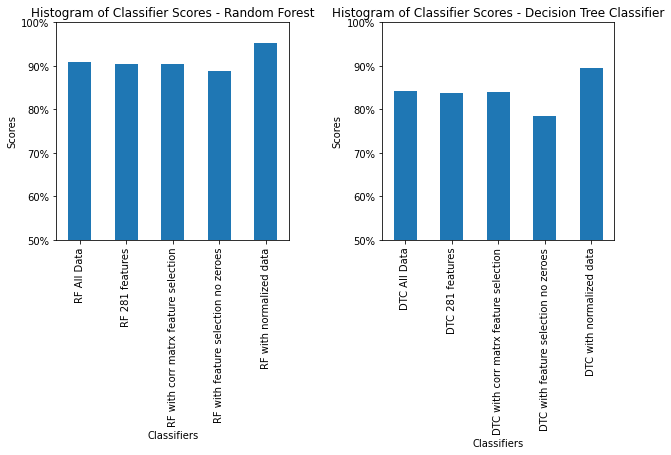

In [81]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

df_transposed = df.transpose()
accuracies_dtc_transposed = accuracies_dtc.transpose()

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot the first histogram on the first subplot
ax1 = df_transposed.plot(kind='bar', legend=False, ax=axes[0])
ax1.set_xlabel('Classifiers')
ax1.set_ylabel('Scores')
ax1.set_title('Histogram of Classifier Scores - Random Forest')
ax1.set_ylim(0.5, 1.0)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))


# Plot the second histogram on the second subplot
ax2 = accuracies_dtc_transposed.plot(kind='bar', legend=False, ax=axes[1])
ax2.set_xlabel('Classifiers')
ax2.set_ylabel('Scores')
ax2.set_title('Histogram of Classifier Scores - Decision Tree Classifier')
ax2.set_ylim(0.5, 1.0)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

plt.subplots_adjust(wspace=0.4)
# Adjust the layout and spacing between subplots
#plt.tight_layout()

# Display the plot
plt.show()